In [1]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import folium

In [4]:
covid19 = pd.read_json('india_statewise.json')
covid19.head()

,success,data,lastRefreshed,lastOriginUpdate
lastRefreshed,True,2020-07-12T03:54:15.207Z,2020-07-12T03:54:15.207Z,2020-07-12T03:54:15.207Z
source,True,covid19india.org,2020-07-12T03:54:15.207Z,2020-07-12T03:54:15.207Z
statewise,True,"[{'state': 'Maharashtra', 'confirmed': 246600,...",2020-07-12T03:54:15.207Z,2020-07-12T03:54:15.207Z
total,True,"{'confirmed': 850358, 'recovered': 536231, 'de...",2020-07-12T03:54:15.207Z,2020-07-12T03:54:15.207Z


In [5]:
df_india = pd.io.json.json_normalize(covid19['data']['statewise'])
df_india

C:\Users\shrey\AppData\Local\Temp\ipykernel_13652\867357321.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  df_india = pd.io.json.json_normalize(covid19['data']['statewise'])


,state,confirmed,recovered,deaths,active
0,Maharashtra,246600,136985,10116,99202
1,Tamil Nadu,134226,85915,1898,46413
2,Delhi,110921,87692,3334,19895
3,Gujarat,41027,28685,2033,10309
4,Uttar Pradesh,35092,22689,913,11490
5,Karnataka,36216,14718,615,20879
6,Telangana,33402,20919,348,12135
7,West Bengal,28453,17959,906,9588
8,Andhra Pradesh,27235,14393,309,12533
9,Rajasthan,23748,17869,503,5376


In [6]:
df_india.set_index('state',inplace=True) # setting the indexing according to the state instead of numbers
df_india.head()

,confirmed,recovered,deaths,active
state,,,,
Maharashtra,246600,136985,10116,99202
Tamil Nadu,134226,85915,1898,46413
Delhi,110921,87692,3334,19895
Gujarat,41027,28685,2033,10309
Uttar Pradesh,35092,22689,913,11490


In [7]:
df_india.drop('State Unassigned' ,inplace=True)

In [8]:
locations = {
    "Kerala" : [10.8505,76.2711],
    "Maharashtra" : [19.7515,75.7139],
    "Karnataka": [15.3173,75.7139],
    "Telangana": [18.1124,79.0193],
    "Uttar Pradesh": [26.8467,80.9462],
    "Rajasthan": [27.0238,74.2179],
    "Gujarat":[22.2587,71.1924],
    "Delhi" : [28.7041,77.1025],
    "Punjab":[31.1471,75.3412],
    "Tamil Nadu": [11.1271,78.6569],
    "Haryana": [29.0588,76.0856],
    "Madhya Pradesh":[22.9734,78.6569],
    "Jammu and Kashmir":[33.7782,76.5762],
    "Ladakh": [34.1526,77.5770],
    "Andhra Pradesh":[15.9129,79.7400],
    "West Bengal": [22.9868,87.8550],
    "Bihar": [25.0961,85.3131],
    "Chhattisgarh":[21.2787,81.8661],
    "Chandigarh":[30.7333,76.7794],
    "Uttarakhand":[30.0668,79.0193],
    "Himachal Pradesh":[31.1048,77.1734],
    "Goa": [15.2993,74.1240],
    "Odisha":[20.9517,85.0985],
    "Andaman and Nicobar Islands": [11.7401,92.6586],
    "Puducherry":[11.9416,79.8083],
    "Manipur":[24.6637,93.9063],
    "Mizoram":[23.1645,92.9376],
    "Assam":[26.2006,92.9376],
    "Meghalaya":[25.4670,91.3662],
    "Tripura":[23.9408,91.9882],
    "Arunachal Pradesh":[28.2180,94.7278],
    "Jharkhand" : [23.6102,85.2799],
    "Nagaland": [26.1584,94.5624],
    "Sikkim": [27.5330,88.5122],
    "Dadra and Nagar Haveli and Daman and Diu":[20.1809,73.0169],
    "Lakshadweep":[10.5667,72.6417],
}

In [9]:
for index in df_india.index:
    df_india.loc[df_india.index==index,'Lat'] = locations[index][0] 
    df_india.loc[df_india.index==index,'Long'] = locations[index][1]

In [10]:
df_india.head()

,confirmed,recovered,deaths,active,Lat,Long
state,,,,,,
Maharashtra,246600,136985,10116,99202,19.7515,75.7139
Tamil Nadu,134226,85915,1898,46413,11.1271,78.6569
Delhi,110921,87692,3334,19895,28.7041,77.1025
Gujarat,41027,28685,2033,10309,22.2587,71.1924
Uttar Pradesh,35092,22689,913,11490,26.8467,80.9462


In [11]:
india = folium.Map(location=[23,80],tiles='cartodbpositron',zoom_start=4,max_zoom=7,min_zoom=4,height=500,width='80%')

In [12]:
india

In [13]:
for i in range(0,len(df_india[df_india['confirmed']>0].index)):  #marking down the circles according to the spread
    
    folium.Circle(    
        location=[df_india.iloc[i]['Lat'],df_india.iloc[i]['Long']],
        tooltip="<h5>"+df_india.iloc[i].name+"</h5>"+
        "<li>Confirmed:"+str(df_india.iloc[i]['confirmed'])+"</li>"+
        "<li>Recovered:"+str(df_india.iloc[i]['recovered'])+"</li>"+
        "<li>Deaths:"+str(df_india.iloc[i]['deaths'])+"</li>"+
        "<li>Active:"+str(df_india.iloc[i]['active'])+"</li>",
        radius=(int((df_india.iloc[i]['confirmed']))*0.5),
        color = '#ff6600',
        fill_color = '#ff6600',
        fill=True).add_to(india)
india

In [14]:
len(df_india[df_india['confirmed']>0].index)

35

In [17]:
df_india['state'] = df_india.index  # This line  we are adding the index as an column.

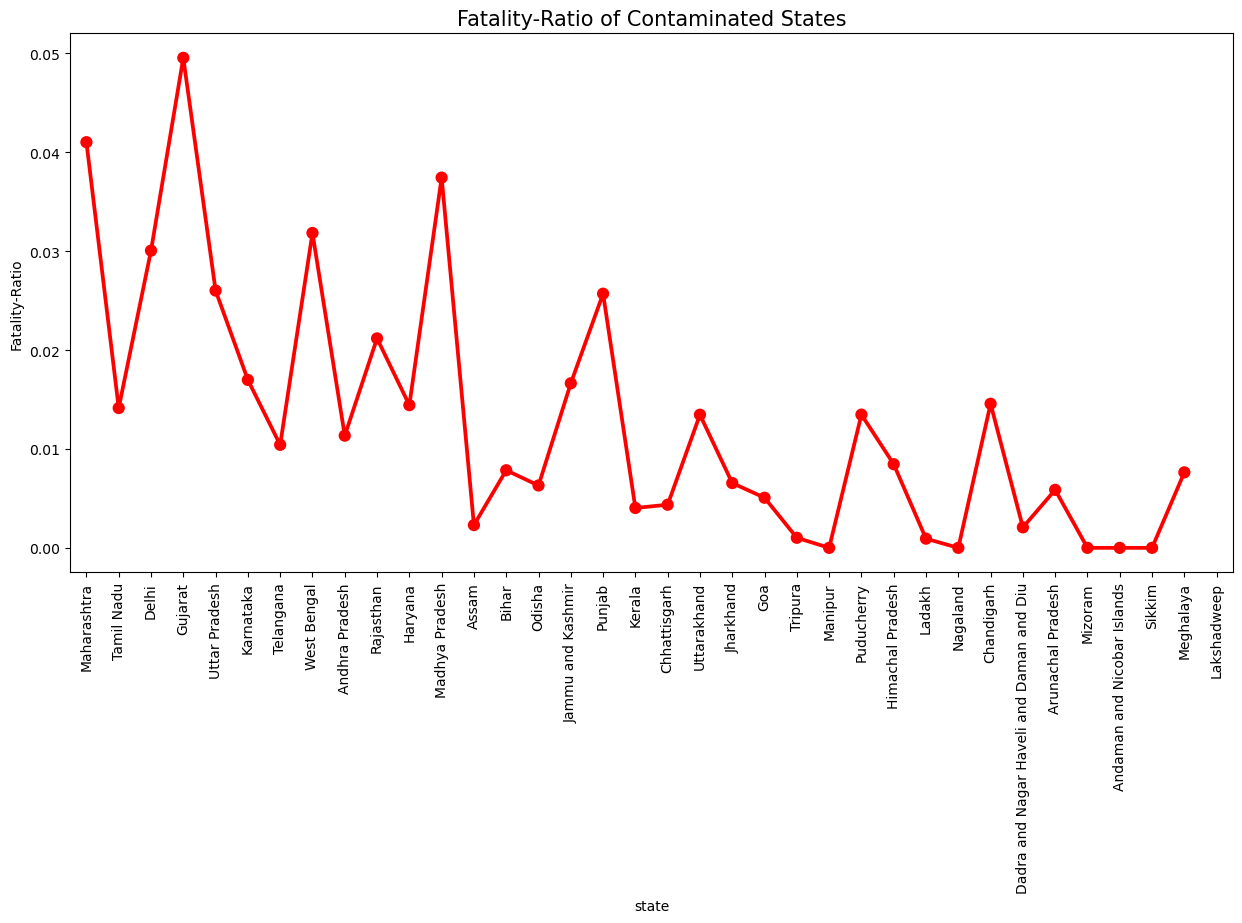

In [18]:
df_india['Fatality-Ratio'] = df_india['deaths']/df_india['confirmed']
a4_dims = (15, 7)
fig, ax = plt.subplots(figsize=a4_dims)
plt.title('Fatality-Ratio of Contaminated States',size=15)
sns.pointplot(data=df_india,x='state',y='Fatality-Ratio',ax=ax,color='Red')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Top 15 Active cases')

<Figure size 4000x2000 with 0 Axes>

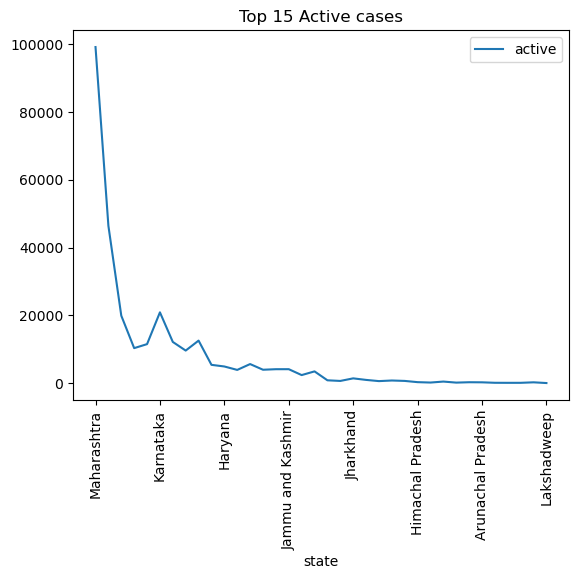

In [31]:
fig = plt.figure(figsize=(40,20))
df_india.plot(kind='line',x='state',y='active',rot=90)
plt.title("Top 15 Active cases")

In [24]:
df_india.head()

,confirmed,recovered,deaths,active,Lat,Long,Fatality-Ratio,state
state,,,,,,,,
Maharashtra,246600,136985,10116,99202,19.7515,75.7139,0.041022,Maharashtra
Tamil Nadu,134226,85915,1898,46413,11.1271,78.6569,0.014140,Tamil Nadu
Delhi,110921,87692,3334,19895,28.7041,77.1025,0.030057,Delhi
Gujarat,41027,28685,2033,10309,22.2587,71.1924,0.049553,Gujarat
Uttar Pradesh,35092,22689,913,11490,26.8467,80.9462,0.026017,Uttar Pradesh


#  Adding recovery and death rates

In [28]:
df_india['Recoveryrate'] = df_india['recovered']*100/df_india['confirmed']
df_india['deathrate'] = df_india['deaths']*100/df_india['confirmed']
df_india

,confirmed,recovered,deaths,active,Lat,Long,Fatality-Ratio,state,Recoveryrate,deathrate
state,,,,,,,,,,
Maharashtra,246600,136985,10116,99202,19.7515,75.7139,0.041022,Maharashtra,55.549473,4.102190
Tamil Nadu,134226,85915,1898,46413,11.1271,78.6569,0.014140,Tamil Nadu,64.007718,1.414033
Delhi,110921,87692,3334,19895,28.7041,77.1025,0.030057,Delhi,79.058068,3.005743
Gujarat,41027,28685,2033,10309,22.2587,71.1924,0.049553,Gujarat,69.917371,4.955273
Uttar Pradesh,35092,22689,913,11490,26.8467,80.9462,0.026017,Uttar Pradesh,64.655762,2.601733
Karnataka,36216,14718,615,20879,15.3173,75.7139,0.016981,Karnataka,40.639496,1.698144
Telangana,33402,20919,348,12135,18.1124,79.0193,0.010419,Telangana,62.627986,1.041854
West Bengal,28453,17959,906,9588,22.9868,87.8550,0.031842,West Bengal,63.118125,3.184199
Andhra Pradesh,27235,14393,309,12533,15.9129,79.7400,0.011346,Andhra Pradesh,52.847439,1.134569
